CO2 Emissions Trending and Prediction

Thank you for sharing this dataset Ulrik Thyge Pedersen.

The first code cell is where you may change the country for which to study a trend and prediction. The world trend is also shown. Just change the country name and Run All.

The country  Sweden  began showing a decline in CO2 emissions after  1970.0
The country  Djibouti  began showing a decline in CO2 emissions after  2013.0
The year  1996.7692307692307  is the mean for when CO2 emissions at a decline were at their peak.
104  countries have shown a CO2 emission decline.

I could add splines. Instead, I put in a quick check to choose quadratic plots for countries that have significantly lowered their CO2 emissions since the mean of the peak year when those 104 counties began to show a decline in CO2 emissions. The world is showing a linear increase in CO2 emissions. With leading indicators, the trending could be made more precise and maybe more accurate.

Ulrik also shared population data, and examination of it suggests population declines are similar.
The country  St. Kitts and Nevis  began showing a decline in population after a maximum size in  1960.0 (per the 1960 start)
The country  Lebanon  began showing a decline in population after a maximum size in  2015.0
The year  1997.9268292682927  is the mean for when populations with a decline were at their peak.
41  countries have shown a population decline.
https://www.kaggle.com/thomasgamet/population-forecasting-using-only-population-data

Population size and CO2 emissions are likely correlated, but it is not evident that CO2 emission changes must follow from population size changes. For example, Iceland is an outlier today with a population increase while its CO2 Emissions decrease. However, both Population size and CO2 emissions are linearly increasing on a global scale. The mean year for decreases of population and CO2 emissions are also very close (1996 and 1997 assuming the calculations are correct for these data sets).

Personal note, hopefully renewable energy and fusion nuclear energy production will some year soon start a global downward trend on CO2 emissions (not counting the 2020 year which will likely be treated as an outlier). Still, until the evidence is clear, the past trends will likely continue which is what this type of forecasting tries to show.


In [1]:
forecastme = 'Iceland'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv


In [3]:
co2df = pd.read_csv("/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv")
co2df['keepyear'] = co2df['year']
co2df.set_index('year', inplace=True)

myseries = co2df.groupby('year').sum()['value']
allco2df = pd.DataFrame([myseries]).transpose()


Took a look at the raw data and found it to be ready for use in models.

In [4]:
co2df.info()
co2df.head()
co2df.nunique()
allco2df.info()
allco2df.head()
allco2df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13953 entries, 1960 to 2019
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   value         13953 non-null  float64
 3   keepyear      13953 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 545.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1960 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   60 non-null     float64
dtypes: float64(1)
memory usage: 3.0 KB


value    60
dtype: int64

In [5]:
all_countries = co2df['country_name'].unique()

min_trend_length = 5 # the population must show a drop over this length of years before we start considering it.
earliest_year_peak = 2019 # start with this out of bounds, the first occurrence puts it in bounds.
latest_year_peak = 1960
average_year_peak = 0
maxvaltimecnt = 0
earliest_country = "none"
latest_country = "none"
for c in all_countries:
    co2df_case = co2df.where(co2df['country_name'] == c)
    co2df_case = co2df_case.copy().dropna()
    latest = co2df_case['keepyear'].max()
    maxvaltime = co2df_case.loc[co2df_case['value'].idxmax(), 'keepyear']
    if maxvaltime < latest - min_trend_length:
        if maxvaltime < earliest_year_peak:
            earliest_year_peak = maxvaltime
            earliest_country = c
        if maxvaltime > latest_year_peak:
            latest_year_peak = maxvaltime
            latest_country = c
        average_year_peak += maxvaltime
        maxvaltimecnt += 1
        
average_year_peak = average_year_peak / maxvaltimecnt
print ("The country ", earliest_country, " began showing a decline in CO2 emissions after ", earliest_year_peak);
print ("The country ", latest_country, " began showing a decline in CO2 emissions after ", latest_year_peak);
print ("The year ", average_year_peak, " is the mean for when CO2 emissions at a decline were at their peak.")
print (maxvaltimecnt, " countries have shown a CO2 emission decline.")

average_year_peak_int = int(average_year_peak)   

The country  Sweden  began showing a decline in CO2 emissions after  1970.0
The country  Djibouti  began showing a decline in CO2 emissions after  2013.0
The year  1996.7692307692307  is the mean for when CO2 emissions at a decline were at their peak.
104  countries have shown a CO2 emission decline.


We will be using Linear Regression for modeling this time series.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## First look at an individual country and all countries together

Globally, the trend is generally upwards.
Odds are monthly or weekly data would show seasonality. Though year over decade data does not appear to have seasonality we will check for this in the next section.
There may be cycles, where there were short term drops in CO2 emissions, but these are likely related to geopolitical and economic development changes. I will guess the Covid-19 pandemic will also show a drop in a future update.

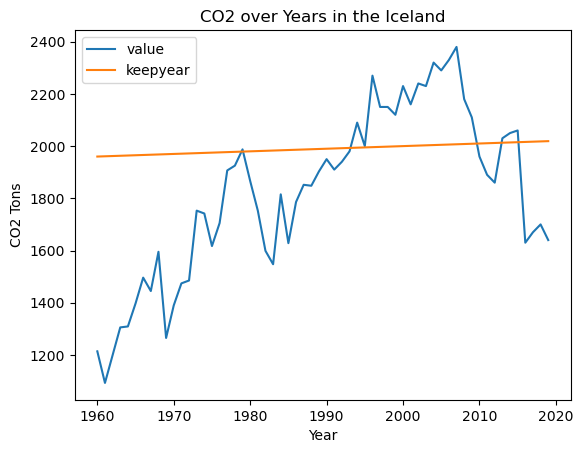

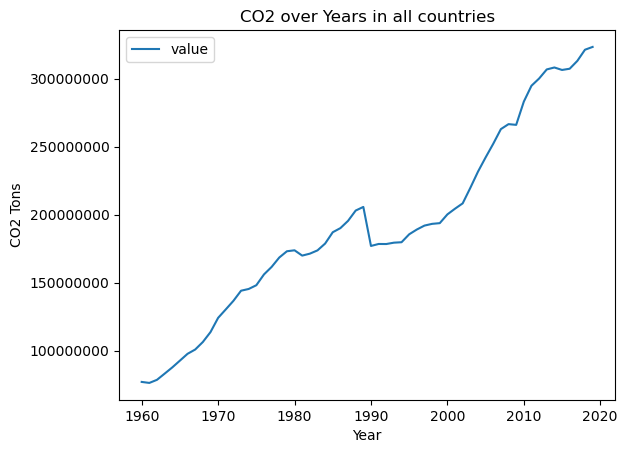

In [7]:


co2df_res = co2df.where(co2df['country_name'] == forecastme)
co2df_res = co2df_res.copy().dropna()

ax = co2df_res.plot()

sns.lineplot(co2df_res=co2df_res['value'], ax=ax, label='Country')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Tons')
ax.set_title("CO2 over Years in the "+forecastme)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

ax = allco2df.plot()

sns.lineplot(allco2df=allco2df['value'], ax=ax, label='All Countries')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Tons')
ax.set_title("CO2 over Years in all countries")
plt.ticklabel_format(axis='y', style='plain')
plt.show()


## Are there any indications of seasonality

No, there are not, though there appear to be cycles the data does not appear to fluctuate on a consistent periodic basis.
The plots below show no spikes indicating seasonal behavior on years or decades.

[0.00000000e+00 7.16691751e-05 1.43338350e-04 ... 4.99820827e-01
 4.99892496e-01 4.99964165e-01]
[3.58059458e-18 2.12484957e+14 2.94490065e+14 ... 3.09642293e+11
 4.59087301e+11 1.68827339e+11]


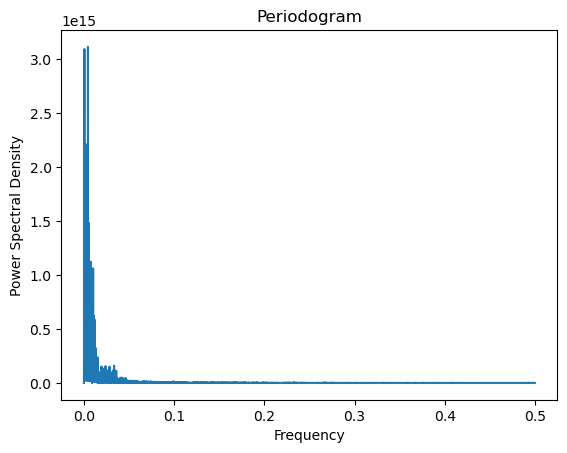

[0.         0.01666667 0.03333333 0.05       0.06666667 0.08333333
 0.1        0.11666667 0.13333333 0.15       0.16666667 0.18333333
 0.2        0.21666667 0.23333333 0.25       0.26666667 0.28333333
 0.3        0.31666667 0.33333333 0.35       0.36666667 0.38333333
 0.4        0.41666667 0.43333333 0.45       0.46666667 0.48333333
 0.5       ]
[9.71223102e-14 1.15489571e+17 9.07507169e+16 2.34879108e+16
 1.33347315e+16 5.62818743e+15 7.42055779e+15 1.82590939e+15
 4.15553505e+15 2.78148250e+15 2.91243880e+15 1.68647459e+15
 1.86749602e+15 9.23647869e+14 1.53805654e+15 8.15757331e+14
 1.51247178e+15 6.99549902e+14 8.16323993e+14 3.85701995e+14
 9.39907013e+14 5.85295726e+14 7.69040868e+14 4.74256431e+14
 5.61218418e+14 4.15887500e+14 6.88406098e+14 3.97202356e+14
 6.76508086e+14 3.57969284e+14 2.94882060e+14]


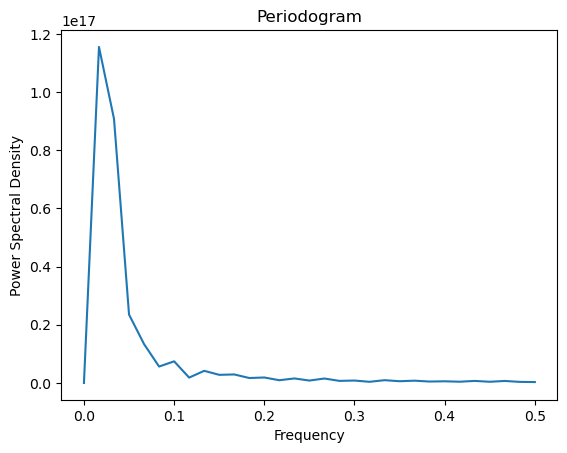

In [8]:
from scipy.signal import periodogram

# compute the periodogram
frequencies, power_spectrum = periodogram(co2df['value'])
print(frequencies)
print(power_spectrum)

# plot the periodogram
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.show()

# compute the periodogram
frequencies, power_spectrum = periodogram(allco2df['value'])
print(frequencies)
print(power_spectrum)

# plot the periodogram
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.show()

## Trending and Forecasting

The order is selected as 2 (quadratic) when a country is likely trending downward on CO2 emissions and is now below the level they had in 1990. The choice of the year 1990 is somewhat arbitrary, though geopolically it was also near a turning point in both economic and polical circumstances.



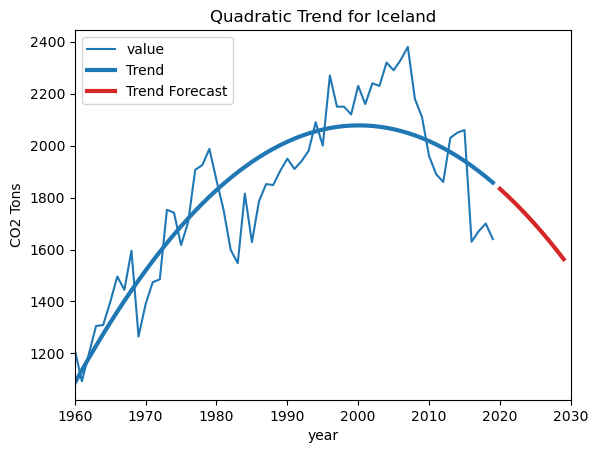

In [9]:
from statsmodels.tsa.deterministic import DeterministicProcess

trend = co2df_res.rolling(
    window=2,       # 1 decade window
    center=True,      # puts the average at the center of the window
    min_periods=1,  # choose about half the window size
).sum()              # compute the mean (could also do median, std, min, max, ...)

y = co2df_res.copy()  # the target
y = y['value']

if (co2df_res.loc[average_year_peak_int, 'value'] > co2df_res.loc[2019, 'value']):
    useorder = 2 # some countries have brought there emissions down, they will fit a parabola better than a line
else:
    useorder = 1
dp = DeterministicProcess(
    index=co2df_res.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=useorder,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

X = dp.in_sample()
X = X.drop('const', axis=1)

X_fore = dp.out_of_sample(steps=10)
X_fore = X_fore.drop('const', axis=1)

model = LinearRegression()

model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

plt.ticklabel_format(axis='y', style='plain')
ax.set_ylim(auto=True)
if useorder == 2:
    ax = y.plot(title="Quadratic Trend for "+forecastme, ylabel="CO2 Tons")
else:
    ax = y.plot(title="Simple Linear Trend for "+forecastme, ylabel="CO2 Tons")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.set_xlim([1960, 2030])

ax.legend();

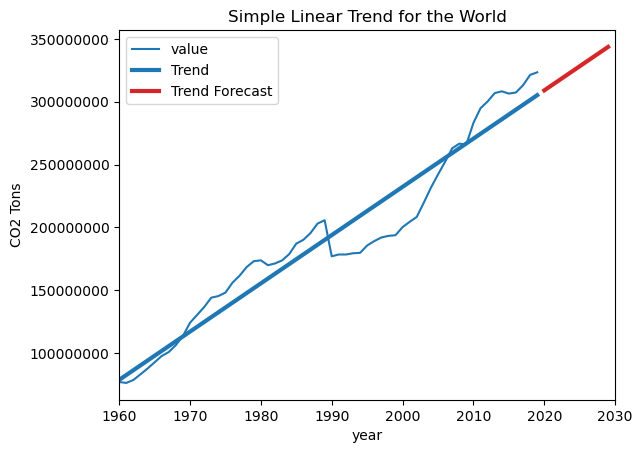

In [10]:
trend = allco2df.rolling(
    window=2,       # 1 decade window
    center=True,      # puts the average at the center of the window
    min_periods=1,  # choose about half the window size
).sum()              # compute the mean (could also do median, std, min, max, ...)

# Make a plot
#ax = co2df.plot()
#ax = trend.plot(ax=ax, linewidth=3)

y = allco2df.copy()  # the target
y = y['value']

dp = DeterministicProcess(
    index=allco2df.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

X = dp.in_sample()
X = X.drop('const', axis=1)

X_fore = dp.out_of_sample(steps=10)
X_fore = X_fore.drop('const', axis=1)

model = LinearRegression()

model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

plt.ticklabel_format(axis='y', style='plain')
ax = y.plot(title="Simple Linear Trend for the World", ylabel="CO2 Tons")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.set_xlim([1960, 2030])
ax.legend();